## Installing Reqiurements Libraries ##

In [2]:
# %pip install numpy
# %pip install pandas 
# %pip install seaborn
# %pip install scikit-learn

## Importing Libraries ##

In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing Data ##

In [47]:
loan_dataframe = pd.read_csv("../data/loan.csv")
loan_dataframe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Analysis by married status ##


In [5]:
married_status = ( loan_dataframe
    .query("Married == 'Yes'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_married_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_married_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("Married", axis=1)
)
unmarried_status = ( loan_dataframe
    .query("Married == 'No'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_unmarried_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_unmarried_status")
    .reset_index()
    .dropna()
    .rename(columns = {"N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("Unmarried", axis=1)
)
unmarried_status

Unmarried,Gender,Unapproved,Approved
0,Female,29.0,51.0
1,Male,49.0,81.0


## Approve Rate for married and unmarried customers ##

In [6]:
married_status["total_count"] = married_status["Approved"] + married_status["Unapproved"]
married_status["Approved_rate"] = ((married_status["Approved"] / married_status["total_count"]) * 100 ).round(2)

unmarried_status["total_count"] = unmarried_status["Approved"] + unmarried_status["Unapproved"]
unmarried_status["Approved_rate"] = ((unmarried_status["Approved"] / unmarried_status["total_count"]) * 100 ).round(2)


total_approved_status = pd.merge(married_status, unmarried_status, on="Gender", how="outer", suffixes=("_Married","_Unmarried"))
total_approved_status


,Gender,Unapproved_Married,Approved_Married,total_count_Married,Approved_rate_Married,Unapproved_Unmarried,Approved_Unmarried,total_count_Unmarried,Approved_rate_Unmarried
0,Female,8.0,23.0,31.0,74.19,29.0,51.0,80.0,63.75
1,Male,101.0,256.0,357.0,71.71,49.0,81.0,130.0,62.31


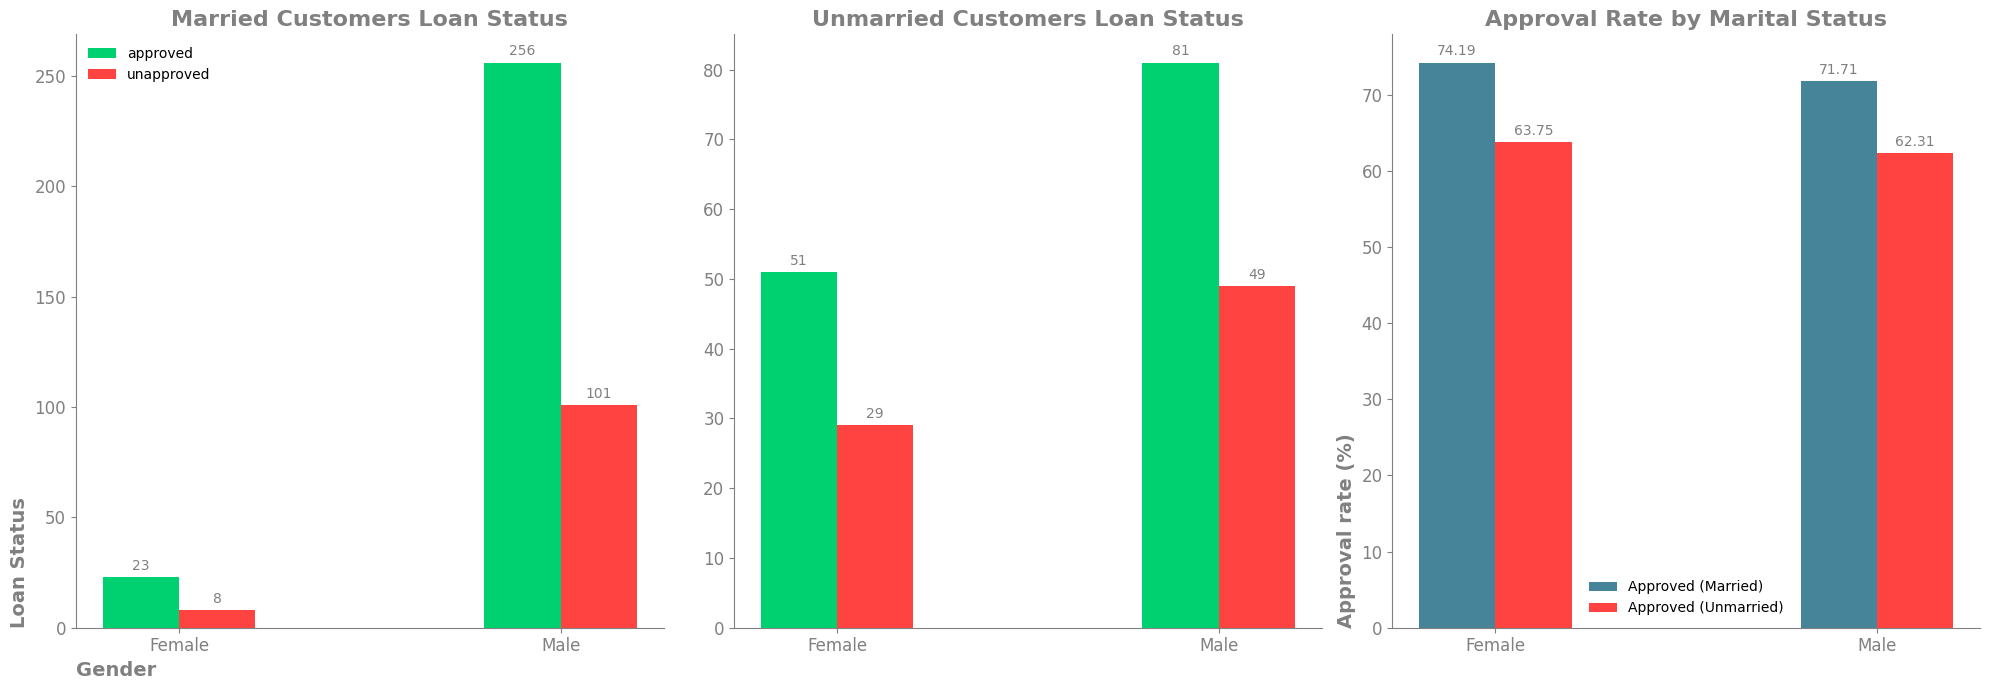

In [ ]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(married_status["Gender"]))
Approved_bars = ax[0].bar(
    data = married_status , 
    x = x- 0.1 ,
    height = married_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "approved"
)

Uanpproved_bars = ax[0].bar(
    data = married_status , 
    x = x + 0.1 ,
    height = married_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "unapproved"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Married Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unmarried
x = np.arange(len(unmarried_status["Gender"]))
Approved_bars = ax[1].bar(
    data = unmarried_status , 
    x = x- 0.1 ,
    height = unmarried_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "'Approved'"
)

Uanpproved_bars = ax[1].bar(
    data = unmarried_status , 
    x = x + 0.1 ,
    height = unmarried_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "'Unapproved'"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unmarried Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(total_approved_status["Gender"]))
Approved_bars = ax[2].bar(
    data = total_approved_status , 
    x = x- 0.1 ,
    height = total_approved_status["Approved_rate_Married"] ,
    width = 0.2 ,
    color = "#468499" , 
    label = "Approved (Married)"
)

Uanpproved_bars = ax[2].bar(
    data = total_approved_status , 
    x = x + 0.1 ,
    height = total_approved_status["Approved_rate_Unmarried"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "Approved (Unmarried)"
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Marital Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')

ax[2].legend(frameon=False, loc="upper right", title="Approval Rate")



plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Education Status ##


In [23]:
graduate_status = ( loan_dataframe
    .query("Education == 'Graduate'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_graduate_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_graduate_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("graduate", axis=1)
)
ungraduate_status = ( loan_dataframe
    .query("Education == 'Not Graduate'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_ungraduate_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_ungraduate_status")
    .reset_index()
    .dropna()
    .rename(columns = {"N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("ungraduate", axis=1)
)
ungraduate_status

ungraduate,Gender,Unapproved,Approved
0,Female,6.0,14.0
1,Male,45.0,68.0


## Approve Rate for graduate and ungraduate customers ##

In [9]:
graduate_status["total_count"] = graduate_status["Approved"] + graduate_status["Unapproved"]
graduate_status["Approved_rate"] = ((graduate_status["Approved"] / graduate_status["total_count"]) * 100 ).round(2)

ungraduate_status["total_count"] = ungraduate_status["Approved"] + ungraduate_status["Unapproved"]
ungraduate_status["Approved_rate"] = ((ungraduate_status["Approved"] / ungraduate_status["total_count"]) * 100 ).round(2)


total_approved_status_g = pd.merge(graduate_status, ungraduate_status, on="Gender", how="outer", suffixes=("_graduate","_ungraduate"))
total_approved_status_g


,Gender,Unapproved_graduate,Approved_graduate,total_count_graduate,Approved_rate_graduate,Unapproved_ungraduate,Approved_ungraduate,total_count_ungraduate,Approved_rate_ungraduate
0,Female,31.0,61.0,92.0,66.30,6.0,14.0,20.0,70.00
1,Male,105.0,271.0,376.0,72.07,45.0,68.0,113.0,60.18


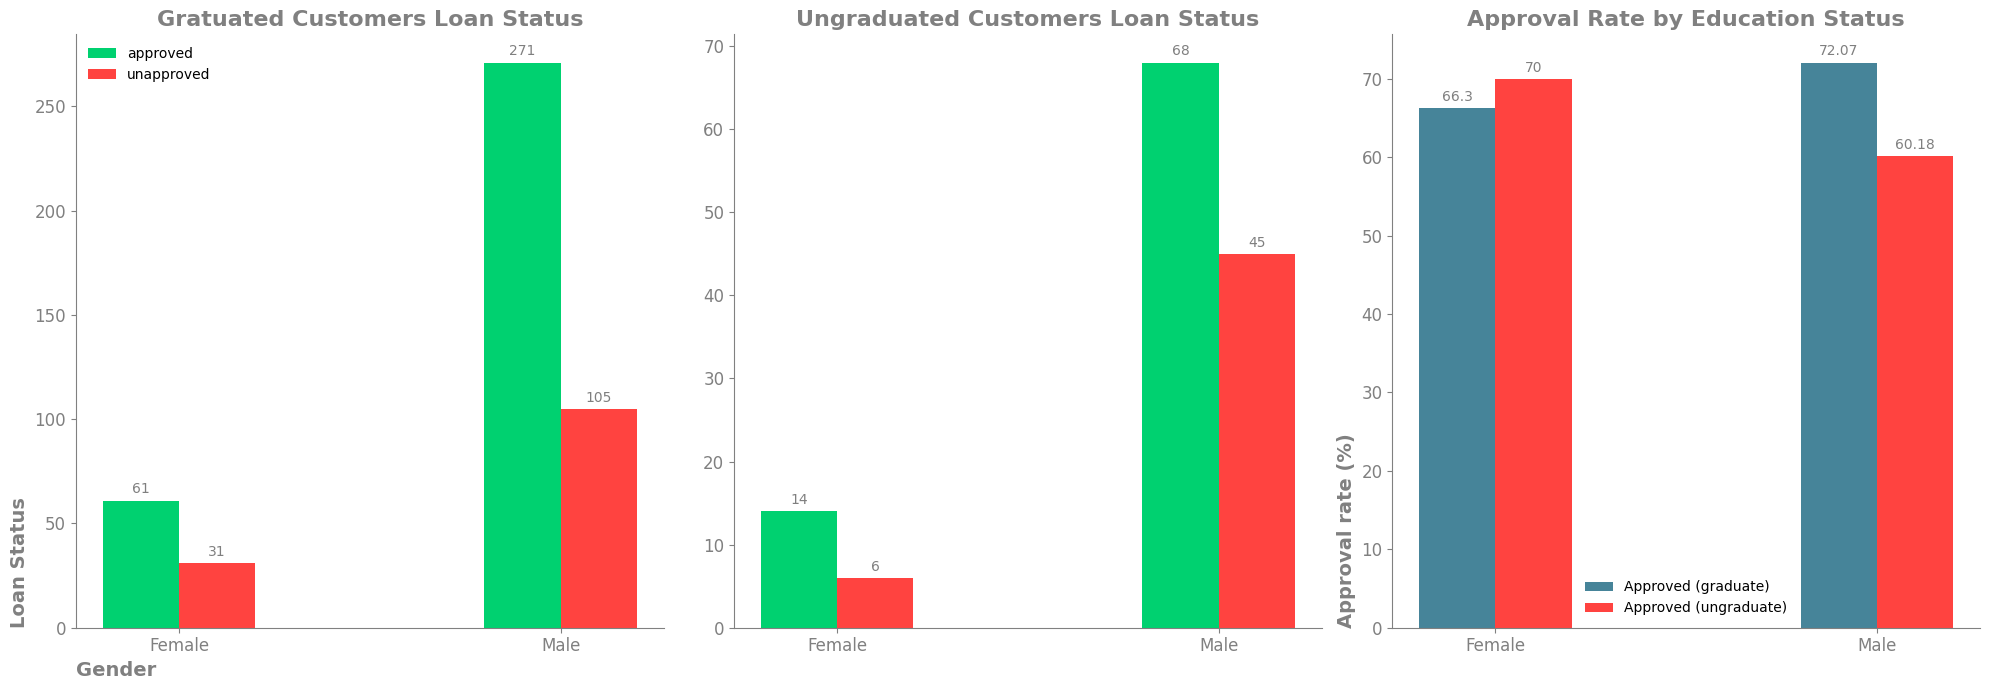

In [ ]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(graduate_status["Gender"]))
Approved_bars = ax[0].bar(
    data = graduate_status , 
    x = x- 0.1 ,
    height = graduate_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "approved"
)

Uanpproved_bars = ax[0].bar(
    data = graduate_status , 
    x = x + 0.1 ,
    height = graduate_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "unapproved"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Gratuated Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for ungraduate
x = np.arange(len(ungraduate_status["Gender"]))
Approved_bars = ax[1].bar(
    data = ungraduate_status , 
    x = x- 0.1 ,
    height = ungraduate_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "'Approved'"
)

Uanpproved_bars = ax[1].bar(
    data = ungraduate_status , 
    x = x + 0.1 ,
    height = ungraduate_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "'Unapproved'"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Ungraduated Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(total_approved_status_g["Gender"]))
Approved_bars = ax[2].bar(
    data = total_approved_status_g , 
    x = x- 0.1 ,
    height = total_approved_status_g["Approved_rate_graduate"] ,
    width = 0.2 ,
    color = "#468499" , 
    label = "Approved (graduate)"
)

Uanpproved_bars = ax[2].bar(
    data = total_approved_status_g , 
    x = x + 0.1 ,
    height = total_approved_status_g["Approved_rate_ungraduate"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "Approved (ungraduate)"
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Education Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')

ax[2].legend(frameon=False, loc="upper right", title="Approval Rate")



plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Self Employed Status ##


In [ ]:
employed_status = ( loan_dataframe
    .query("Self_Employed == 'Yes'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_employed_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_employed_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("employed", axis=1)
)
unemployed_status = ( loan_dataframe
    .query("Self_Employed == 'No'")
    .groupby(["Gender", "Loan_Status"] , as_index = False)
    .agg(
        total_unemployed_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = "Loan_Status" , values = "total_unemployed_status")
    .reset_index()
    .dropna()
    .rename(columns = {"N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis("unemployed", axis=1)
)


unemployed,Gender,Unapproved,Approved
0,Female,29.0,60.0
1,Male,123.0,279.0


## Approve Rate for Self-employed or not ##

In [13]:
employed_status["total_count"] = employed_status["Approved"] + employed_status["Unapproved"]
employed_status["Approved_rate"] = ((employed_status["Approved"] / employed_status["total_count"]) * 100 ).round(2)

unemployed_status["total_count"] = unemployed_status["Approved"] + unemployed_status["Unapproved"]
unemployed_status["Approved_rate"] = ((unemployed_status["Approved"] / unemployed_status["total_count"]) * 100 ).round(2)


total_approved_status_e = pd.merge(employed_status, unemployed_status, on="Gender", how="outer", suffixes=("_employed","_unemployed"))
total_approved_status_e

,Gender,Unapproved_employed,Approved_employed,total_count_employed,Approved_rate_employed,Unapproved_unemployed,Approved_unemployed,total_count_unemployed,Approved_rate_unemployed
0,Female,6.0,9.0,15.0,60.00,29.0,60.0,89.0,67.42
1,Male,20.0,43.0,63.0,68.25,123.0,279.0,402.0,69.40


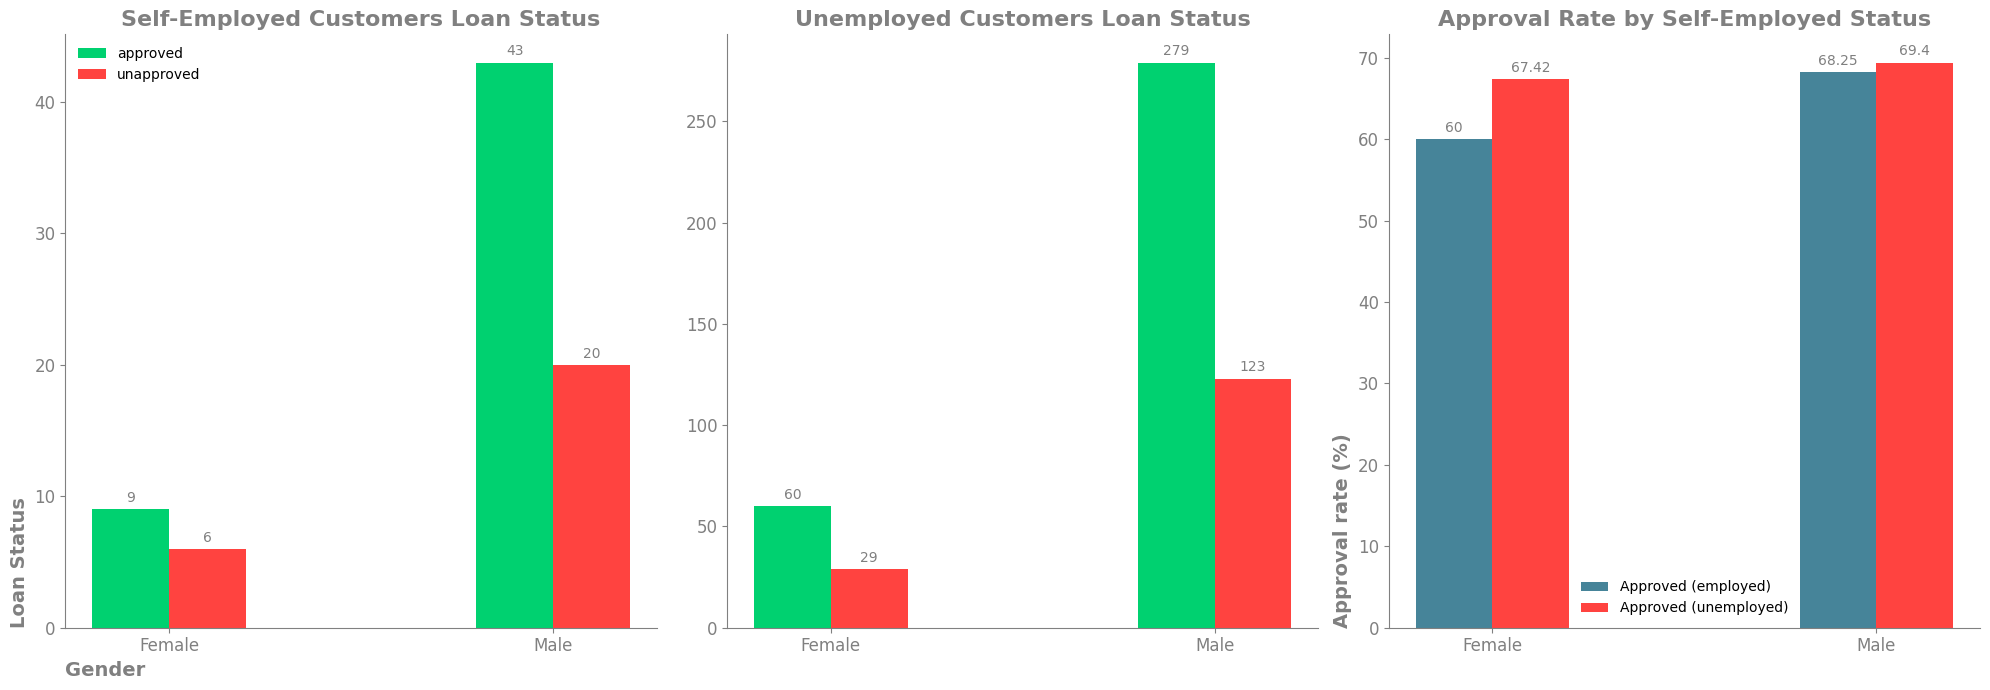

In [ ]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(employed_status["Gender"]))
Approved_bars = ax[0].bar(
    data = employed_status , 
    x = x- 0.1 ,
    height = employed_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "approved"
)

Uanpproved_bars = ax[0].bar(
    data = employed_status , 
    x = x + 0.1 ,
    height = employed_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "unapproved"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Self-Employed Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unemployed
x = np.arange(len(unemployed_status["Gender"]))
Approved_bars = ax[1].bar(
    data = unemployed_status , 
    x = x- 0.1 ,
    height = unemployed_status["Approved"] ,
    width = 0.2 ,
    color = "#00D170" , 
    label = "'Approved'"
)

Uanpproved_bars = ax[1].bar(
    data = unemployed_status , 
    x = x + 0.1 ,
    height = unemployed_status["Unapproved"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "'Unapproved'"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unemployed Customers Loan Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(total_approved_status_e["Gender"]))
Approved_bars = ax[2].bar(
    data = total_approved_status_e , 
    x = x- 0.1 ,
    height = total_approved_status_e["Approved_rate_employed"] ,
    width = 0.2 ,
    color = "#468499" , 
    label = "Approved (employed)"
)

Uanpproved_bars = ax[2].bar(
    data = total_approved_status_e , 
    x = x + 0.1 ,
    height = total_approved_status_e["Approved_rate_unemployed"] ,
    width = 0.2 ,
     color = "#FF4340" ,
     label = "Approved (unemployed)"
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(Approved_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Uanpproved_bars , padding= 3 , alpha = 0.5)

ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Self-Employed Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')

ax[2].legend(frameon=False, loc="upper right", title="Approval Rate")



plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Property Area Status ##


In [11]:
property_status = ( loan_dataframe

    .groupby(["Gender", "Loan_Status" , "Property_Area"] , as_index = False)
    .agg(
        total_property_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = ["Loan_Status" , "Property_Area"] , values = "total_property_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis(["Status", "Area"], axis=1)
)

property_status

Status  Gender Unapproved                 Approved                 
Area                Rural Semiurban Urban    Rural Semiurban  Urban
0       Female       10.0      13.0  14.0     14.0      42.0   19.0
1         Male       57.0      39.0  54.0     94.0     133.0  112.0

## Approval Rate for Each Area ##

In [12]:
for area in ["Rural" , "Semiurban" , "Urban"] :
    property_status[f"Approval_rate_{area}"] = (
        property_status[("Approved" , area)] / (property_status[("Approved" , area)] + property_status[("Unapproved" , area)])*100).round(2)
    

property_status

Status  Gender Unapproved                 Approved                   \
Area                Rural Semiurban Urban    Rural Semiurban  Urban   
0       Female       10.0      13.0  14.0     14.0      42.0   19.0   
1         Male       57.0      39.0  54.0     94.0     133.0  112.0   

Status Approval_rate_Rural Approval_rate_Semiurban Approval_rate_Urban  
Area                                                                    
0                    58.33                   76.36               57.58  
1                    62.25                   77.33               67.47

C:\Users\alire\AppData\Local\Temp\ipykernel_3036\877506996.py:175: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon = False)


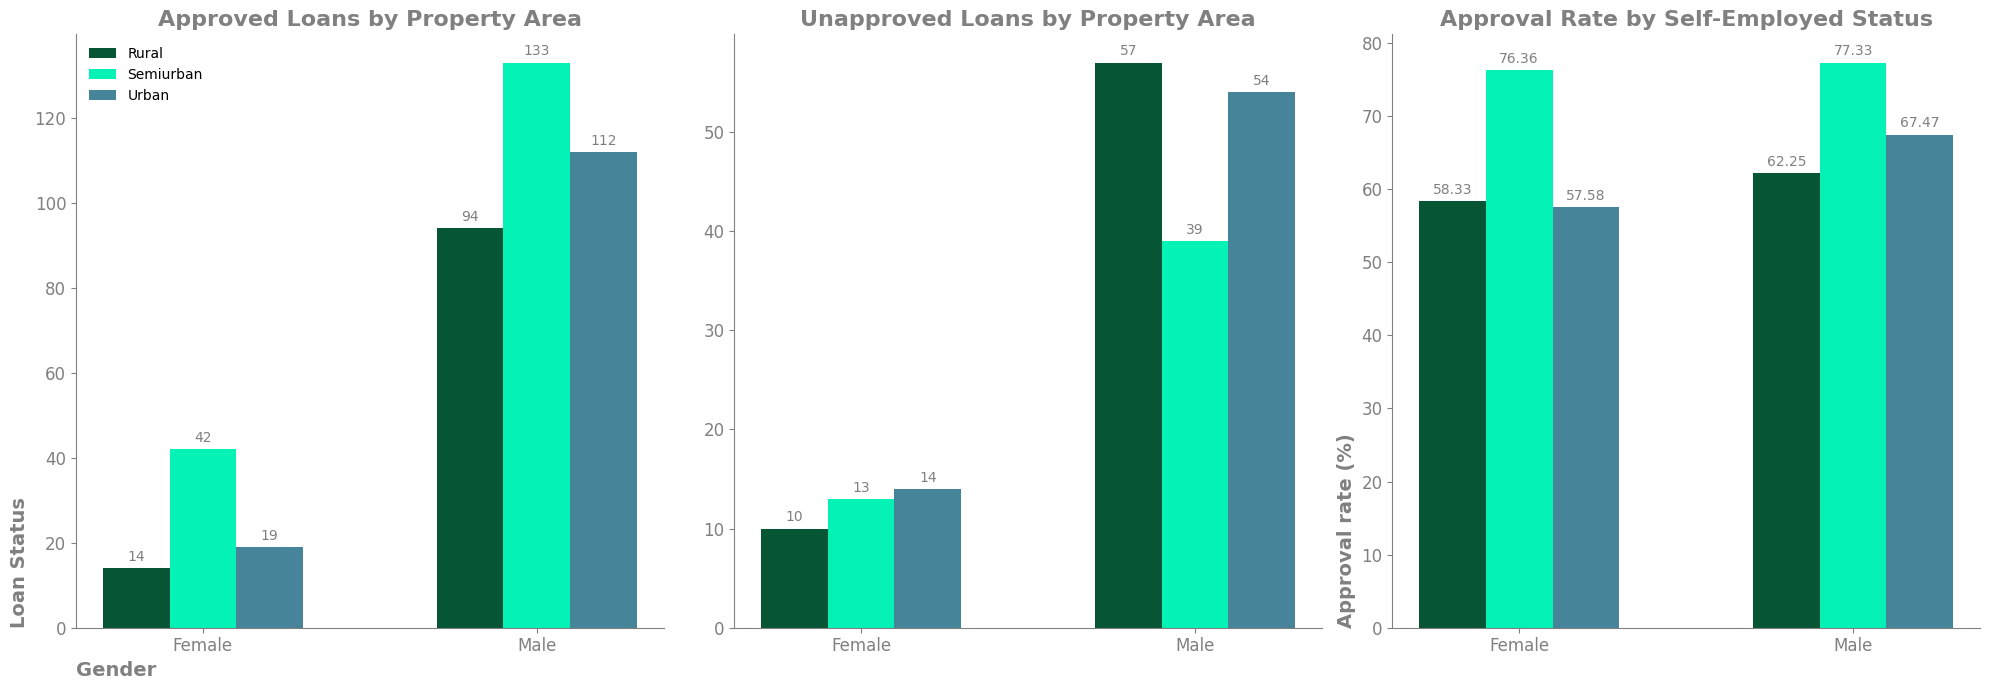

In [13]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(property_status["Gender"]))

Rural_bars = ax[0].bar(
    data = property_status , 
    x = x- 0.2 ,
    height = property_status[( "Approved" , "Rural")] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "Rural"
)

Semiurban_bars = ax[0].bar(
    data = property_status , 
    x = x ,
    height = property_status[("Approved"  , "Semiurban")] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "Semiurban"
)
Urban_bars = ax[0].bar(
    data = property_status , 
    x = x + 0.2 ,
    height = property_status[( "Approved" , "Urban")] ,
    width = 0.2 ,
     color = "#468499" ,
     label = "Urban"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(Rural_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Semiurban_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(Urban_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Approved Loans by Property Area" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unemployed
x = np.arange(len(property_status["Gender"]))

Rural_bars = ax[1].bar(
    data = property_status , 
    x = x- 0.2 ,
    height = property_status[( "Unapproved" , "Rural")] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "Rural"
)

Semiurban_bars = ax[1].bar(
    data = property_status , 
    x = x ,
    height = property_status[("Unapproved" , "Semiurban")] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "Semiurban"
)
Urban_bars = ax[1].bar(
    data = property_status , 
    x = x + 0.2 ,
    height = property_status[( "Unapproved", "Urban")] ,
    width = 0.2 ,
     color = "#468499" ,
     label = "Urban"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(Rural_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Semiurban_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(Urban_bars , padding= 3 , alpha = 0.5)

ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unapproved Loans by Property Area" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(property_status["Gender"]))

Rural_bars = ax[2].bar(
    data = property_status , 
    x = x- 0.2 ,
    height = property_status["Approval_rate_Rural"] ,
    width = 0.2 ,
    color = "#065535" 
)

Semiurban_bars = ax[2].bar(
    data = property_status , 
    x = x ,
    height = property_status["Approval_rate_Semiurban"] ,
    width = 0.2 ,
     color = "#05F2B7" 
)
Urban_bars = ax[2].bar(
    data = property_status , 
    x = x + 0.2 ,
    height = property_status["Approval_rate_Urban"] ,
    width = 0.2 ,
     color = "#468499" 
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(Rural_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Semiurban_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(Urban_bars , padding= 3 , alpha = 0.5)

ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Self-Employed Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')





plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Dependents Status ##


In [15]:
dependents_status = ( loan_dataframe
    .groupby(["Gender", "Loan_Status" , "Dependents"] , as_index = False)
    .agg(
        total_dependents_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = ["Loan_Status" , "Dependents"] , values = "total_dependents_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis(["Status", "dependents"], axis=1)
)
dependents_status

Status      Gender Unapproved                   Approved                  
dependents                  0     1     2    3+        0     1     2    3+
0           Female       26.0   6.0   2.0   2.0     54.0  13.0   5.0   1.0
1             Male       78.0  30.0  21.0  16.0    180.0  52.0  71.0  29.0

## Approval Rate for Each Dependents ##

In [17]:
for dep in ["0" , "1" , "2" , "3+"] :
   dependents_status[f"Approval_rate_{dep}"] = (
   dependents_status[("Approved" , dep)] / (dependents_status[("Approved" , dep)] + dependents_status[("Unapproved" , dep)])*100).round(2)

dependents_status

Status      Gender Unapproved                   Approved                    \
dependents                  0     1     2    3+        0     1     2    3+   
0           Female       26.0   6.0   2.0   2.0     54.0  13.0   5.0   1.0   
1             Male       78.0  30.0  21.0  16.0    180.0  52.0  71.0  29.0   

Status     Approval_rate_0 Approval_rate_1 Approval_rate_2 Approval_rate_3+  
dependents                                                                   
0                    67.50           68.42           71.43            33.33  
1                    69.77           63.41           77.17            64.44

C:\Users\alire\AppData\Local\Temp\ipykernel_3036\1171140228.py:202: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon = False)


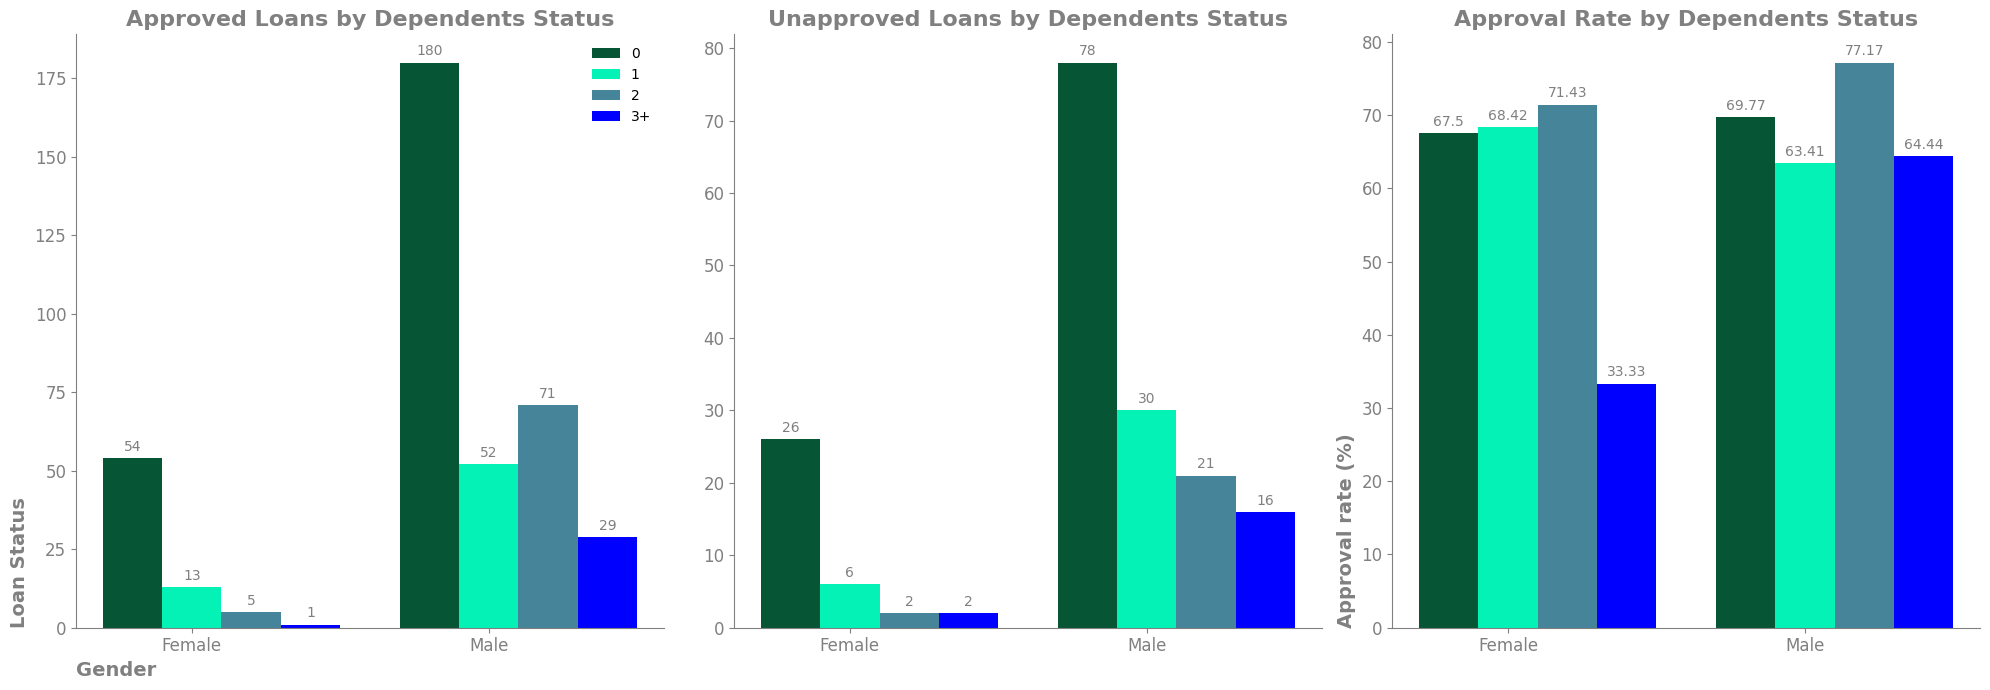

In [26]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))

x = np.arange(len(dependents_status["Gender"]))

zero_bars = ax[0].bar(
    data = dependents_status , 
    x = x- 0.2 ,
    height = dependents_status[( "Approved" , "0")] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "0"
)

one_bars = ax[0].bar(
    data = dependents_status , 
    x = x ,
    height = dependents_status[("Approved"  , "1")] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "1"
)
two_bars = ax[0].bar(
    data = dependents_status , 
    x = x + 0.2 ,
    height = dependents_status[( "Approved" , "2")] ,
    width = 0.2 ,
     color = "#468499" ,
     label = "2"
)
more_3_bars = ax[0].bar(
    data = dependents_status , 
    x = x + 0.4 ,
    height = dependents_status[( "Approved" , "3+")] ,
    width = 0.2 ,
     color = "#0000ff" ,
     label = "3+"
)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])

ax[0].bar_label(zero_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(one_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(two_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(more_3_bars , padding= 3 , alpha = 0.5)

ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Approved Loans by Dependents Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unemployed
x = np.arange(len(dependents_status["Gender"]))

zero_bars = ax[1].bar(
    data = dependents_status , 
    x = x- 0.2 ,
    height = dependents_status[( "Unapproved" , "0")] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "0"
)

one_bars = ax[1].bar(
    data = dependents_status , 
    x = x ,
    height = dependents_status[("Unapproved"  , "1")] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "1"
)
two_bars = ax[1].bar(
    data = dependents_status , 
    x = x + 0.2 ,
    height = dependents_status[( "Unapproved" , "2")] ,
    width = 0.2 ,
     color = "#468499" ,
     label = "2"
)
more_3_bars = ax[1].bar(
    data = dependents_status , 
    x = x + 0.4 ,
    height = dependents_status[( "Unapproved" , "3+")] ,
    width = 0.2 ,
     color = "#0000ff" ,
     label = "3+"
)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])

ax[1].bar_label(zero_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(one_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(two_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(more_3_bars , padding= 3 , alpha = 0.5)


ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unapproved Loans by Dependents Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(dependents_status["Gender"]))

zero_bars = ax[2].bar(
    data = dependents_status , 
    x = x- 0.2 ,
    height = dependents_status[ "Approval_rate_0"] ,
    width = 0.2 ,
    color = "#065535" 
)
one_bars = ax[2].bar(
    data = dependents_status , 
    x = x ,
    height = dependents_status["Approval_rate_1" ] ,
    width = 0.2 ,
     color = "#05F2B7" 
)
two_bars = ax[2].bar(
    data = dependents_status , 
    x = x + 0.2 ,
    height = dependents_status["Approval_rate_2"] ,
    width = 0.2 ,
     color = "#468499" 
)
more_3_bars = ax[2].bar(
    data = dependents_status , 
    x = x + 0.4 ,
    height = dependents_status[ "Approval_rate_3+"] ,
    width = 0.2 ,
     color = "#0000ff" 
)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])

ax[2].bar_label(zero_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(one_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(two_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(more_3_bars , padding= 3 , alpha = 0.5)


ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Dependents Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')





plt.legend(frameon = False)
plt.tight_layout()
plt.show()

## Analysis by Credit Status ##


In [ ]:

credit_status = ( loan_dataframe
    .groupby(["Gender", "Loan_Status" , "Credit_History"] , as_index = False)
    .agg(
        total_credit_status = ("Loan_Status" , "count"))
    .pivot_table(index = "Gender" , columns = ["Loan_Status" , "Credit_History"] , values = "total_credit_status")
    .reset_index()
    .dropna()
    .rename(columns = { "N" : "Unapproved" ,"Y" : "Approved"} )
    .rename_axis(["Status", "credit history"], axis=1)
)
credit_status

Status          Gender Unapproved       Approved       
credit history                0.0   1.0      0.0    1.0
0               Female       16.0  20.0      1.0   64.0
1                 Male       63.0  75.0      6.0  307.0

In [40]:
cr_values = credit_status["Approved"].columns
for cr in cr_values:
   credit_status[f"Approval_rate_{cr}"] = (
   credit_status[("Approved" , cr)] / (credit_status[("Approved" , cr)] + credit_status[("Unapproved" , cr)])*100).round(2)

credit_status

Status          Gender Unapproved       Approved        Approval_rate_0.0  \
credit history                0.0   1.0      0.0    1.0                     
0               Female       16.0  20.0      1.0   64.0              5.88   
1                 Male       63.0  75.0      6.0  307.0              8.70   

Status         Approval_rate_1.0  
credit history                    
0                          76.19  
1                          80.37

C:\Users\alire\AppData\Local\Temp\ipykernel_3036\1851718540.py:162: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon = False)


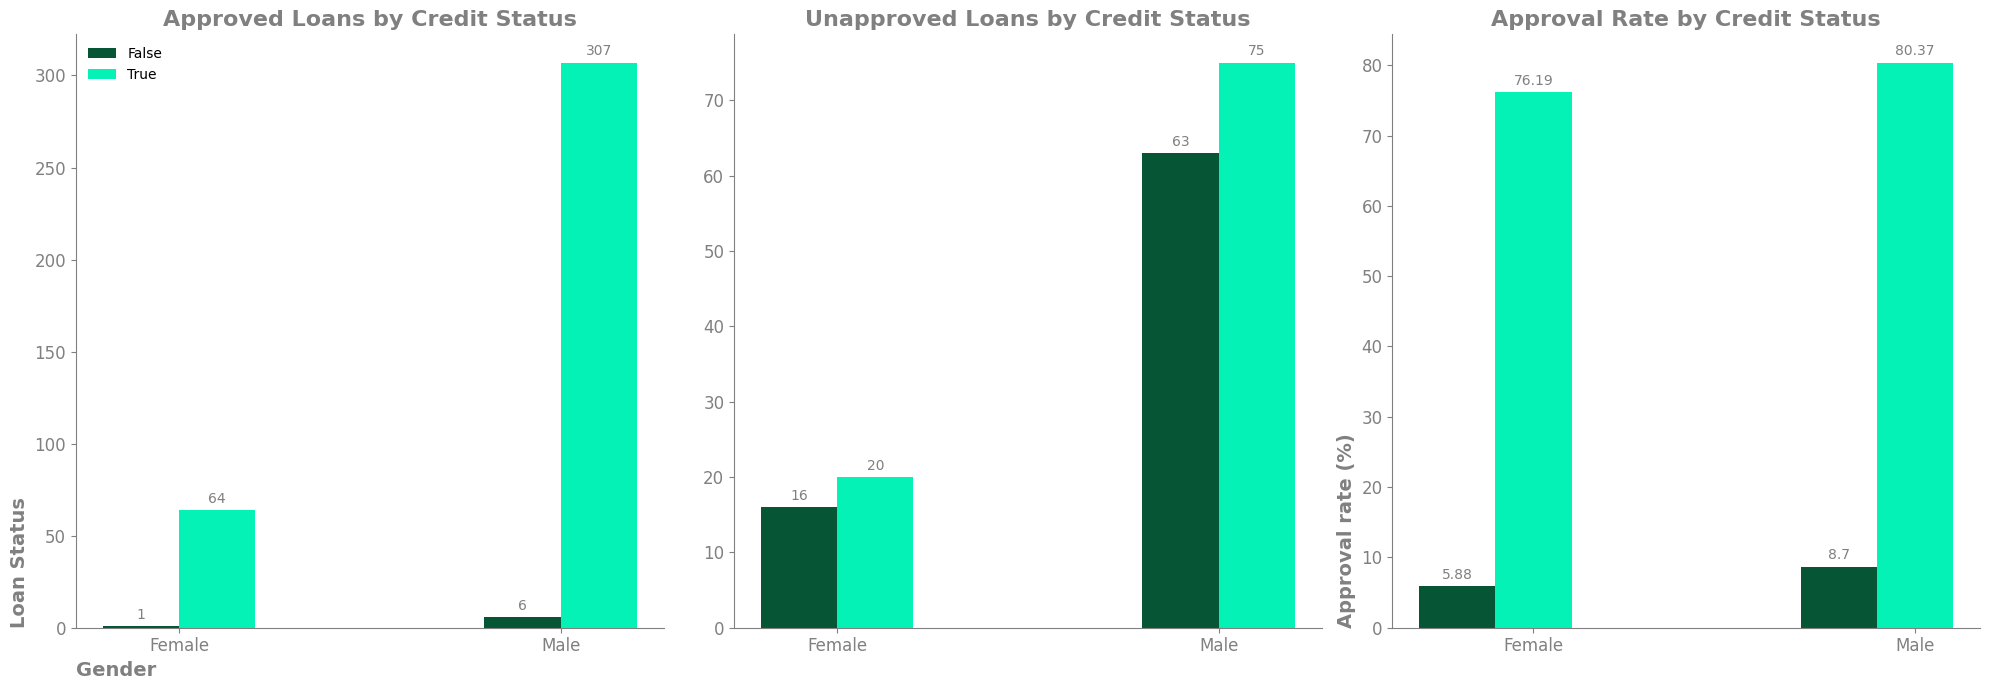

In [45]:
fig,ax = plt.subplots(1,3 ,figsize=(20,7))


cr_vals = list(credit_status["Approved"].columns)   
cr0, cr1 = cr_vals[0], cr_vals[1]



x = np.arange(len(credit_status["Gender"]))

false_bars = ax[0].bar(
    data = credit_status , 
    x = x- 0.1 ,
    height = credit_status[( "Approved" , cr0)] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "False"
)

true_bars = ax[0].bar(
    data = credit_status , 
    x = x + 0.1 ,
    height = credit_status[("Approved"  , cr1)] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "True"
)

ax[0].bar_label(false_bars , padding= 3 , alpha = 0.5)
ax[0].bar_label(true_bars , padding= 3 , alpha = 0.5)

ax[0].spines[["right" , "top"]].set_visible(False)
ax[0].spines[["left" , "bottom"]].set_color('gray')  

ax[0].set_xticks( x , [ "Female" , "Male" ])




ax[0].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[0].set_title("Approved Loans by Credit Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)
ax[0].set_xlabel(
    "Gender",
    loc="left",
    weight="bold",
    fontsize=14,
    color="gray",
)
ax[0].set_ylabel(
    "Loan Status",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

##for unemployed
x = np.arange(len(credit_status["Gender"]))

false_bars = ax[1].bar(
    data = credit_status , 
    x = x- 0.1 ,
    height = credit_status[( "Unapproved" , cr0)] ,
    width = 0.2 ,
    color = "#065535" , 
    label = "False"
)

true_bars = ax[1].bar(
    data = credit_status , 
    x = x + 0.1 ,
    height = credit_status[("Unapproved"  , cr1)] ,
    width = 0.2 ,
     color = "#05F2B7" ,
     label = "True"
)

ax[1].bar_label(false_bars , padding= 3 , alpha = 0.5)
ax[1].bar_label(true_bars , padding= 3 , alpha = 0.5)

ax[1].spines[["right" , "top"]].set_visible(False)
ax[1].spines[["left" , "bottom"]].set_color('gray')  

ax[1].set_xticks( x , [ "Female" , "Male" ])



ax[1].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[1].set_title("Unapproved Loans by Credit Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

##for approval rate

x = np.arange(len(credit_status["Gender"]))

false_bars = ax[2].bar(
    data = credit_status , 
    x = x- 0.2 ,
    height = credit_status[f"Approval_rate_{cr0}"] ,
    width = 0.2 ,
    color = "#065535" 
)

true_bars = ax[2].bar(
    data = credit_status , 
    x = x ,
    height = credit_status[f"Approval_rate_{cr1}"] ,
    width = 0.2 ,
     color = "#05F2B7" 
)

ax[2].bar_label(false_bars , padding= 3 , alpha = 0.5)
ax[2].bar_label(true_bars , padding= 3 , alpha = 0.5)

ax[2].spines[["right" , "top"]].set_visible(False)
ax[2].spines[["left" , "bottom"]].set_color('gray')  

ax[2].set_xticks( x , [ "Female" , "Male" ])



ax[2].tick_params(axis = "x" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].tick_params(axis = "y" ,
                    colors = "gray" ,
                    labelsize = "large")
ax[2].set_title("Approval Rate by Credit Status" ,
                    color = "gray" ,
                    weight = "bold",
                    fontsize = 16)

ax[2].set_ylabel(
    "Approval rate (%)",
    loc="bottom",
    weight="bold",
    fontsize=14,
    color="gray",
)

ax[0].legend(frameon=False, loc='best')





plt.legend(frameon = False)
plt.tight_layout()
plt.show()

In [49]:
loan_dataframe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Analysis Numerical Datas ##

In [68]:
def numerical_datas_fig(df, col):
    approved = df.loc[df["Loan_Status"] == "Y", col].dropna()
    unapproved = df.loc[df["Loan_Status"] == "N", col].dropna()

    print(f"{col}")
    print("Approved Stats:")
    print(approved.describe())
    print("\nUnapproved Stats:")
    print(unapproved.describe())

    fig, ax = plt.subplots(1, 2, figsize=(16, 7))

    sns.histplot(
        data=approved,
        bins=30,
        kde=True,
        color="#468499",
        edgecolor="gray",
        ax=ax[0]
        
    )
    ax[0].spines[["right", "top"]].set_visible(False)
    ax[0].spines[["left", "bottom"]].set_color("gray")
    
    ax[0].tick_params(axis="x", colors="gray", labelsize="large")
    ax[0].tick_params(axis="y", colors="gray", labelsize="large")
    
    ax[0].set_title(f"Approved Loans by {col} Status",
                    fontsize=18, color="gray")
    ax[0].set_xlabel(f"{col}", color="gray",
                     weight="bold", fontsize=14, loc="left")
    ax[0].set_ylabel("Loan Status", color="gray",
                     weight="bold", fontsize=14, loc="bottom")

    ax[0].grid(axis="x", linestyle="")
    ax[0].grid(axis="y", linestyle="dotted", linewidth=1)


    sns.histplot(
        data=unapproved,
        bins=30,
        kde=True,
        color="#468499",
        edgecolor="gray",
        ax=ax[1]
    )
    ax[1].spines[["right", "top"]].set_visible(False)
    ax[1].spines[["left", "bottom"]].set_color("gray")
    
    ax[1].tick_params(axis="x", colors="gray", labelsize="large")
    ax[1].tick_params(axis="y", colors="gray", labelsize="large")
    
    ax[1].set_title(f"Unaprroved Loans by {col} Status",
                    fontsize=18, color="gray")
    ax[1].grid(axis="x", linestyle="")
    ax[1].grid(axis="y", linestyle="dotted", linewidth=1)

    ax[1].set_xlabel("")
    ax[1].set_ylabel("")


    plt.show()

                   



ApplicantIncome
Approved Stats:
count      422.000000
mean      5384.068720
std       5765.441615
min        210.000000
25%       2877.500000
50%       3812.500000
75%       5771.500000
max      63337.000000
Name: ApplicantIncome, dtype: float64

Unapproved Stats:
count      192.000000
mean      5446.078125
std       6819.558528
min        150.000000
25%       2885.000000
50%       3833.500000
75%       5861.250000
max      81000.000000
Name: ApplicantIncome, dtype: float64


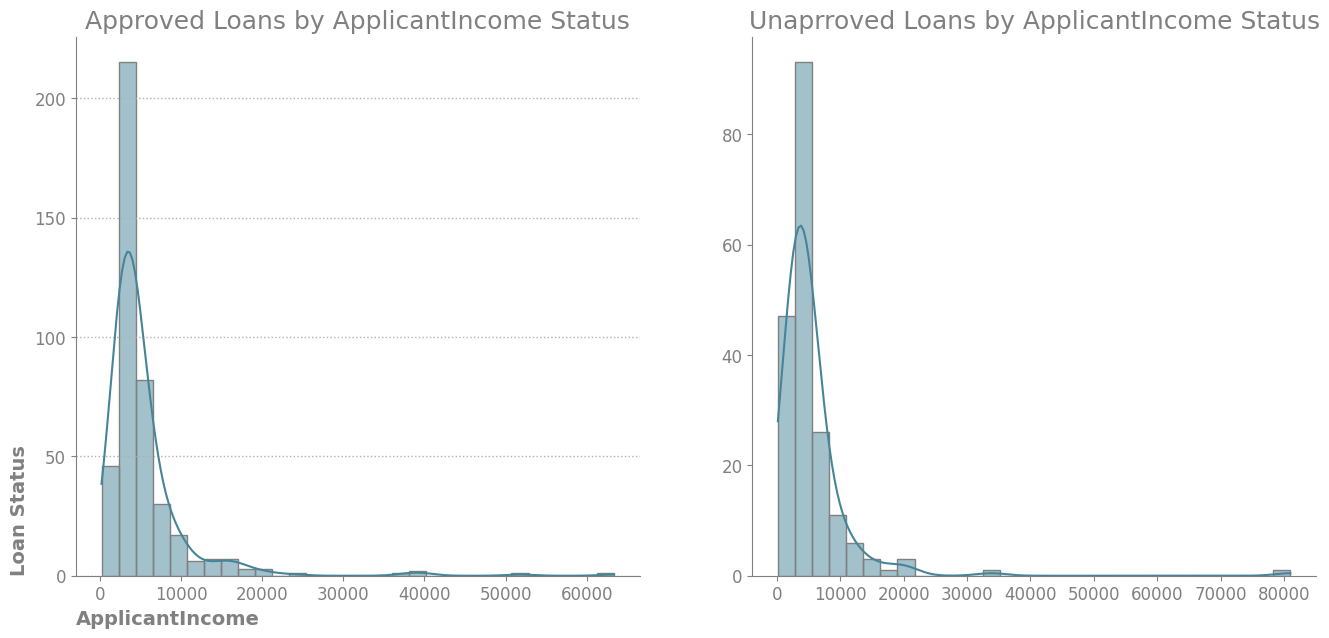

CoapplicantIncome
Approved Stats:
count      422.000000
mean      1504.516398
std       1924.754855
min          0.000000
25%          0.000000
50%       1239.500000
75%       2297.250000
max      20000.000000
Name: CoapplicantIncome, dtype: float64

Unapproved Stats:
count      192.000000
mean      1877.807292
std       4384.060103
min          0.000000
25%          0.000000
50%        268.000000
75%       2273.750000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


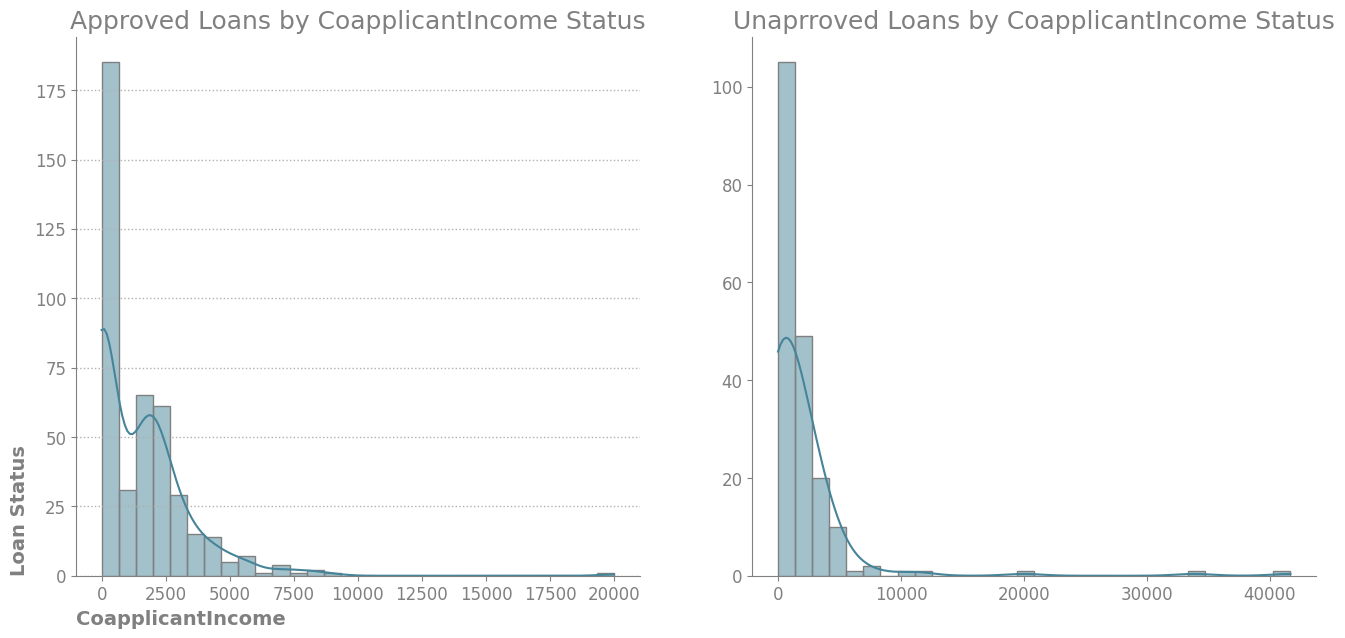

LoanAmount
Approved Stats:
count    411.000000
mean     144.294404
std       85.484607
min       17.000000
25%      100.000000
50%      126.000000
75%      161.000000
max      700.000000
Name: LoanAmount, dtype: float64

Unapproved Stats:
count    181.000000
mean     151.220994
std       85.862783
min        9.000000
25%      100.000000
50%      129.000000
75%      176.000000
max      570.000000
Name: LoanAmount, dtype: float64


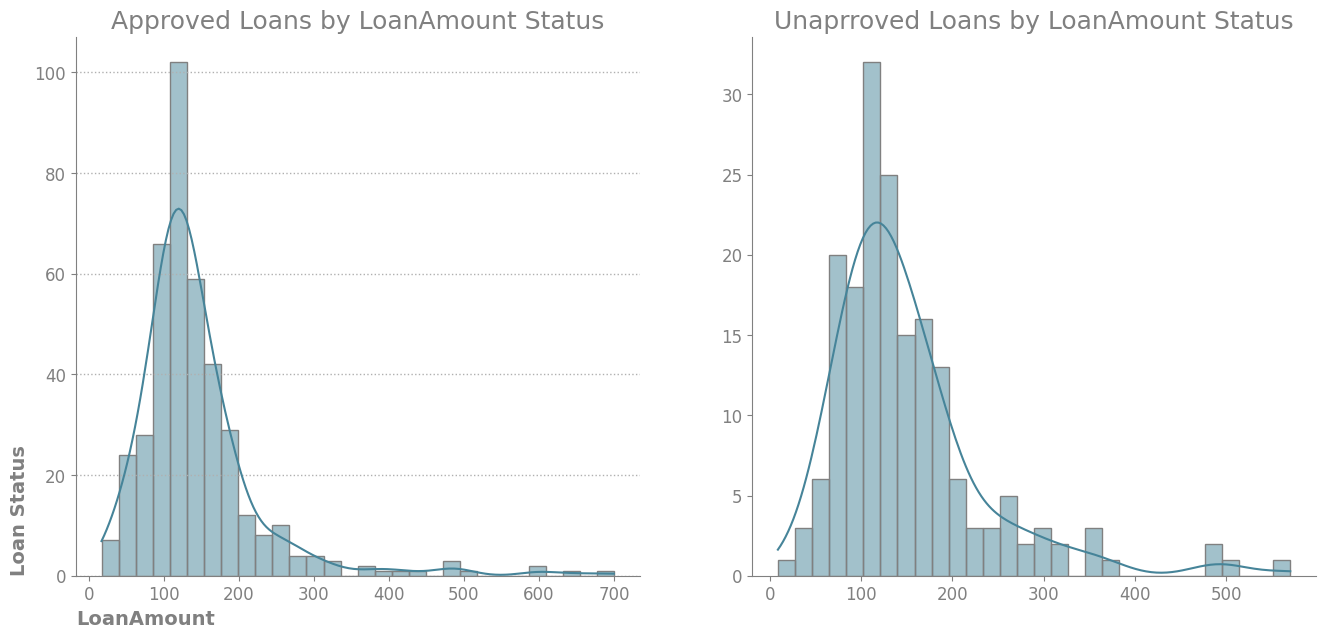

In [66]:
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
    numerical_datas_fig(loan_dataframe, col)